#### **Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"** 

#### *Data Description :*
- Undergrad : person is under graduated or not 
- Marital.Status : marital status of a person 
- Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
- Work Experience : Work experience of an individual person 
- Urban : Whether that person belongs to urban area or not

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## 2. Importing dataset

In [2]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 3. Initial Data Analysis

In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraud_data.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


## 4. Data Visualization

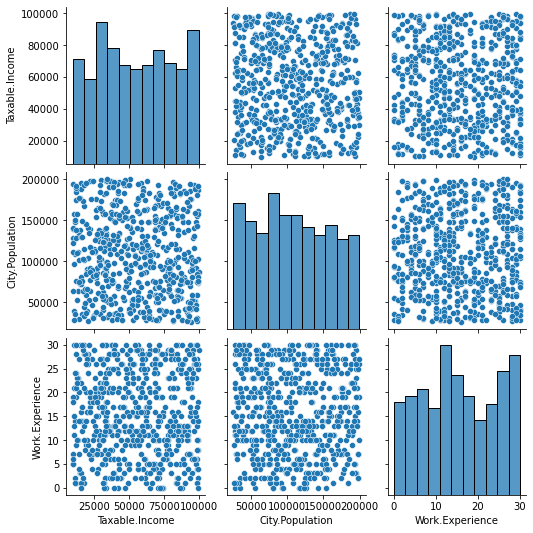

In [8]:
sns.pairplot(fraud_data)
plt.show()

***Correlation Analysis*** 

In [9]:
corr = fraud_data.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


***Heatmap for Correlation Analysis*** 

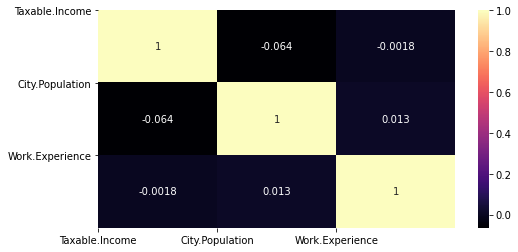

In [10]:
fig, ax = plt.subplots(figsize= (8, 4))
sns.heatmap(corr, cmap='magma', annot=True)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

***Countplot for Categorical data***

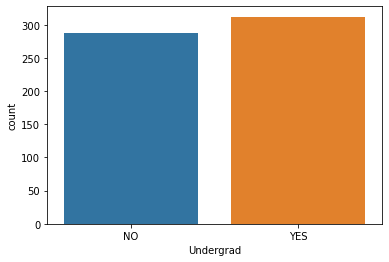

In [11]:
sns.countplot(fraud_data['Undergrad'])
plt.show()

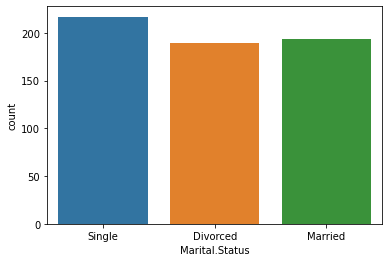

In [12]:
sns.countplot(fraud_data['Marital.Status'])
plt.show()

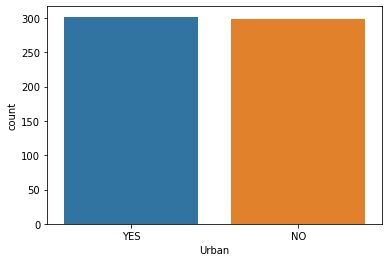

In [13]:
sns.countplot(fraud_data['Urban'])
plt.show()

## 5. Data Preparation 

#### *Data Transformation*
- One Hot Encoding

In [14]:
fraud_ohe = pd.get_dummies(data=fraud_data, columns = ['Undergrad','Marital.Status','Urban'])
fraud_ohe

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


**List Comprehension**

In [15]:
for i in range(len(fraud_ohe['Taxable.Income'])):
    if fraud_ohe['Taxable.Income'][i] <= 30000:
        fraud_ohe['Taxable.Income'][i] = 'risky'
    else:
        fraud_ohe['Taxable.Income'][i] = 'good'

## 6. Model Building

In [16]:
X = fraud_ohe.drop(labels='Taxable.Income',axis=1)
y = fraud_ohe[['Taxable.Income']]

In [17]:
X

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [18]:
y

,Taxable.Income
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


## 7. Model Training 

#### **Train-test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [20]:
X_train.shape , y_train.shape                 # Training data

((480, 9), (480, 1))

In [21]:
X_test.shape , y_test.shape                   # Test data

((120, 9), (120, 1))

#### *Decision Tree Classifier*

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

## 8. Model Testing

In [23]:
y_train_pred = dt_model.predict(X_train)            # Training Data

In [24]:
y_test_pred = dt_model.predict(X_test)              # Test Data

## 9. Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix 

***Training Data***

In [26]:
print("Accuracy score of Training data : ",round(accuracy_score(y_train,y_train_pred),3))

Accuracy score of Training data :  1.0


In [27]:
confusion_matrix(y_train,y_train_pred)

array([[369,   0],
       [  0, 111]], dtype=int64)

***Test Data***

In [28]:
print("Accuracy score of Test data : ",round(accuracy_score(y_test,y_test_pred),3))

Accuracy score of Test data :  0.65


In [29]:
confusion_matrix(y_test,y_test_pred)

array([[75, 32],
       [10,  3]], dtype=int64)

#### ***Feature Selection***

In [30]:
dt_model.feature_importances_

array([0.57775596, 0.22280811, 0.02202435, 0.03146643, 0.03651038,
       0.02270276, 0.03783412, 0.02356997, 0.02532793])

In [31]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': dt_model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [32]:
fi

,feature,importance
0,City.Population,0.577756
1,Work.Experience,0.222808
6,Marital.Status_Single,0.037834
4,Marital.Status_Divorced,0.036510
3,Undergrad_YES,0.031466
8,Urban_YES,0.025328
7,Urban_NO,0.023570
5,Marital.Status_Married,0.022703
2,Undergrad_NO,0.022024


## 10. *Visualizing the Decision Tree Plot*

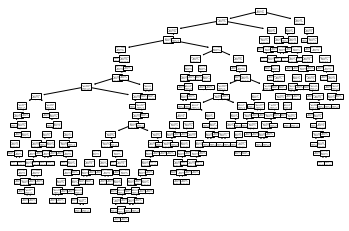

In [33]:
from sklearn import tree
tree.plot_tree(dt_model);

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### *Gini index*

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=6)
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

## 11. Model Testing after imputing Gini impurity

In [35]:
y_train_pred2 = model_gini.predict(X_train)              # Training Data

In [36]:
y_test_pred2 = model_gini.predict(X_test)                # Test Data

## 12. Model Evaluation after imputing Gini impurity

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix 

***Training Data***

In [38]:
print("Accuracy score of Training data (Gini impurity) : ",round(accuracy_score(y_train,y_train_pred2),3))

Accuracy score of Training data (Gini impurity) :  0.802


In [39]:
confusion_matrix(y_train,y_train_pred2)

array([[367,   2],
       [ 93,  18]], dtype=int64)

***Test Data***

In [40]:
print("Accuracy score of Test data (Gini impurity) : ",round(accuracy_score(y_test,y_test_pred2),3))

Accuracy score of Test data (Gini impurity) :  0.85


In [41]:
confusion_matrix(y_test,y_test_pred2)

array([[102,   5],
       [ 13,   0]], dtype=int64)

#### ***Feature Selection after imputing Gini impurity***

In [42]:
model_gini.feature_importances_

array([0.59470411, 0.35134188, 0.        , 0.02825723, 0.        ,
       0.02569677, 0.        , 0.        , 0.        ])

In [43]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': model_gini.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [44]:
fi

,feature,importance
0,City.Population,0.594704
1,Work.Experience,0.351342
3,Undergrad_YES,0.028257
5,Marital.Status_Married,0.025697
2,Undergrad_NO,0.000000
4,Marital.Status_Divorced,0.000000
6,Marital.Status_Single,0.000000
7,Urban_NO,0.000000
8,Urban_YES,0.000000


- ***City.Population is the most important feature.*** 

## 13. **Visualizing the Decision Tree Plot after imputing Gini impurity**

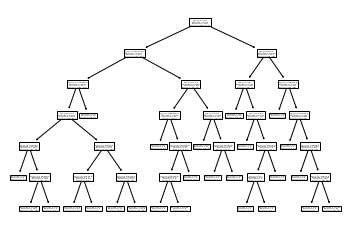

In [45]:
from sklearn import tree
tree.plot_tree(model_gini)
plt.show()

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**